In [1]:
import numpy as np, scipy.stats as ss, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

##**Create and assign values to parameters we'll need for the bivariate normal:**

In [2]:
#standard deviations and correlation
sig_x = 0.1
sig_y = 0.05
rho_xy = 0.9

#covariance between X and Y
sig_xy = rho_xy * sig_x * sig_y

#create covariance matrix
Sigma_xy = [[sig_x**2, sig_xy],[sig_xy, sig_y**2]]

#These are the means
mu_x = 0.05
mu_y = 0.025

means=(mu_x,mu_y)
covs=Sigma_xy
xy_vals = np.random.multivariate_normal(means,covs,(100))

##**Plot the bivariate normal:**

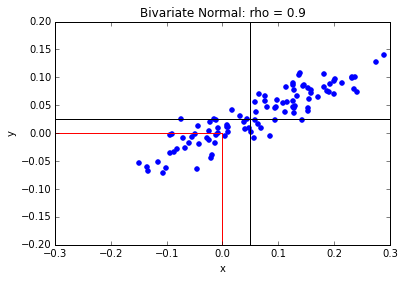

In [3]:
#plot the randomly sampled points from the bivariate distribution
plt.scatter(xy_vals[:,0],xy_vals[:,1],color='b')
plt.title('Bivariate Normal: rho = 0.9')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-.3, .3, -0.2, 0.2])

#plot the means as lines. There might be a better way to do this.
plt.plot([mu_x, mu_x],[-1,1],[-0.5, 0.5],[mu_y, mu_y],color='k') 

#Plot lines to show what bounds we'd like to integrate to to find joint probability
plt.plot([0, 0],[-99,0],[-99,0],[0,0],color='r') 

##**Compute the joint probability of our bivariate normal**

In [4]:
#This function is analagous to pvnorm in R
#a good explanation for it is here http://www.nhsilbert.net/source/2014/04/multivariate-normal-cdf-values-in-python/
#As you can see, you cannot use -inf (or +inf) as integration bounds. But as long as we're far enough away from the
#mean, that should be ok

#here we are integrating x = -inf --> 0 and y=-inf-->0
ss.mvn.mvnun([-9999,-9999],[0,0],means=means,covar=covs)

(0.24532588993020887, 0)

##**Do the exact same analysis as before, except now use negative correlation $\rho$=-0.9**:

(0.0008028801759927262, 0)

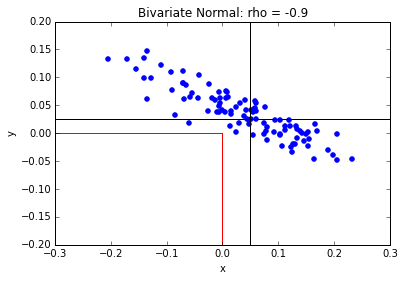

In [5]:
#standard deviations and correlation
sig_x = 0.1
sig_y = 0.05
rho_xy = -0.9 #Note this is negative now

#covariance between X and Y
sig_xy = rho_xy * sig_x * sig_y

#create covariance matrix
Sigma_xy = [[sig_x**2, sig_xy],[sig_xy, sig_y**2]]

#we are given the means
mu_x = 0.05
mu_y = 0.025

#create new variables for ease of plotting 
means=(mu_x,mu_y)
covs=Sigma_xy
xy_vals = np.random.multivariate_normal(means,covs,(100))


#plot the randomly sampled points from the bivariate distribution
plt.scatter(xy_vals[:,0],xy_vals[:,1],color='b')
plt.title('Bivariate Normal: rho = -0.9')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-.3, .3, -0.2, 0.2])

#plot the means as lines. There might be a better way to do this.
plt.plot([mu_x, mu_x],[-1,1],[-0.5, 0.5],[mu_y, mu_y],color='k') 
plt.plot([mu_x, mu_x],[-1,1],[-0.5, 0.5],[mu_y, mu_y],color='k') 
plt.plot([0, 0],[-99,0],[-99,0],[0,0],color='r') 

#we are again trying to integrate x and y from -inf --> 0
#but now we see that clearly, we are not covering much of the distribution
ss.mvn.mvnun([-9999,-9999],[0,0],means=means,covar=covs)

##**And again, but with no correlation, i.e. $\rho=0$**

(0.09519541280308991, 0)

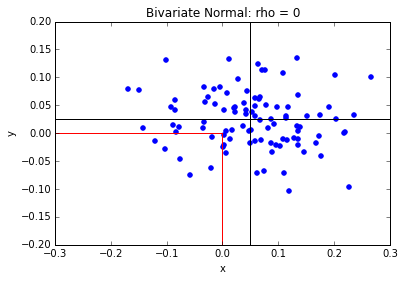

In [6]:
#standard deviations and correlation
sig_x = 0.1
sig_y = 0.05
rho_xy = 0 #Note this is negative now

#covariance between X and Y
sig_xy = rho_xy * sig_x * sig_y

#create covariance matrix
Sigma_xy = [[sig_x**2, sig_xy],[sig_xy, sig_y**2]]

#we are given the means
mu_x = 0.05
mu_y = 0.025

#create new variables for ease of plotting 
means=(mu_x,mu_y)
covs=Sigma_xy
xy_vals = np.random.multivariate_normal(means,covs,(100))


#plot the randomly sampled points from the bivariate distribution
plt.scatter(xy_vals[:,0],xy_vals[:,1],color='b')
plt.title('Bivariate Normal: rho = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-.3, .3, -0.2, 0.2])

#plot the means as lines. There might be a better way to do this.
plt.plot([mu_x, mu_x],[-1,1],[-0.5, 0.5],[mu_y, mu_y],color='k') 
plt.plot([mu_x, mu_x],[-1,1],[-0.5, 0.5],[mu_y, mu_y],color='k') 
plt.plot([0, 0],[-99,0],[-99,0],[0,0],color='r') 

#we are again trying to integrate x and y from -inf --> 0
#but now we see that clearly, we are not covering much of the distribution
ss.mvn.mvnun([-9999,-9999],[0,0],means=means,covar=covs)